In [54]:
#Importar librerias de Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor


In [55]:
#Importar librerias de SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [56]:
#Cargar dataset
df = pd.read_csv(r"C:\Users\pc\Documents\GitHub\tfm_xavierMedina\vsCode - transformation\inhami_transformed.csv", delimiter=";")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15427 entries, 0 to 15426
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          15427 non-null  int64  
 1   Estacion                    15427 non-null  int64  
 2   longitud2                   15427 non-null  float64
 3   latitud2                    15427 non-null  float64
 4   altitud                     15427 non-null  int64  
 5   anio                        15427 non-null  int64  
 6   precipitaciones Dia         15427 non-null  float64
 7   precipitaciones Noche       15427 non-null  float64
 8   temperatura Dia             15427 non-null  float64
 9   temperatura Noche           15427 non-null  int64  
 10  H. del Suelo Dia            15427 non-null  int64  
 11  H. del Suelo Noche          15427 non-null  int64  
 12  Evapotranspiracion Dia      15427 non-null  float64
 13  Evapotranspiracion Noche    154

# EDA - ANALISIS EXPLORATORIO DE DATOS

 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15427 entries, 0 to 15426
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          15427 non-null  int64  
 1   Estacion                    15427 non-null  int64  
 2   longitud2                   15427 non-null  float64
 3   latitud2                    15427 non-null  float64
 4   altitud                     15427 non-null  int64  
 5   anio                        15427 non-null  int64  
 6   precipitaciones Dia         15427 non-null  float64
 7   precipitaciones Noche       15427 non-null  float64
 8   temperatura Dia             15427 non-null  float64
 9   temperatura Noche           15427 non-null  int64  
 10  H. del Suelo Dia            15427 non-null  int64  
 11  H. del Suelo Noche          15427 non-null  int64  
 12  Evapotranspiracion Dia      15427 non-null  float64
 13  Evapotran

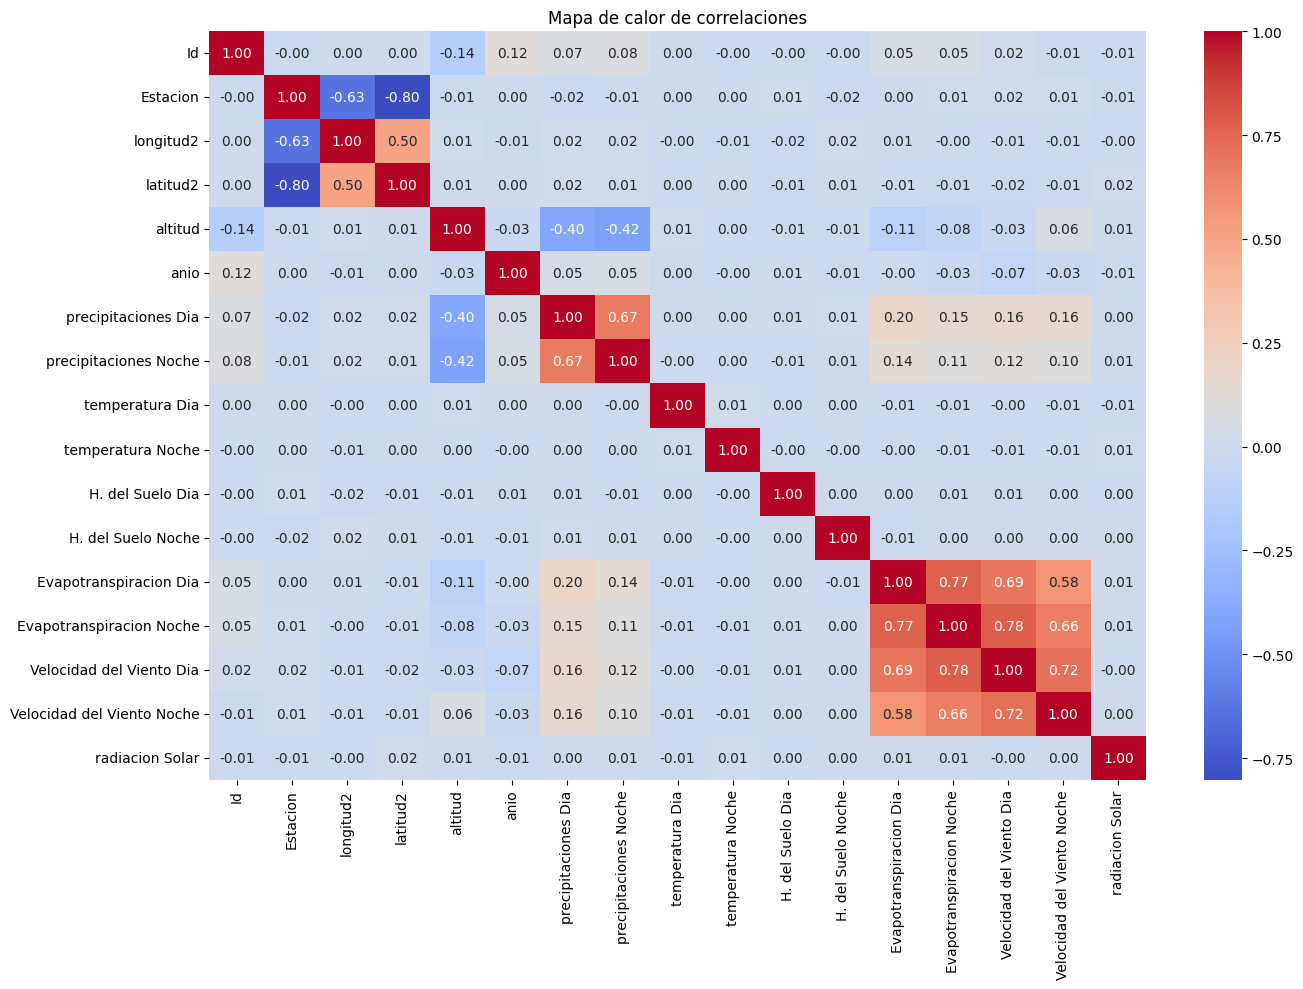

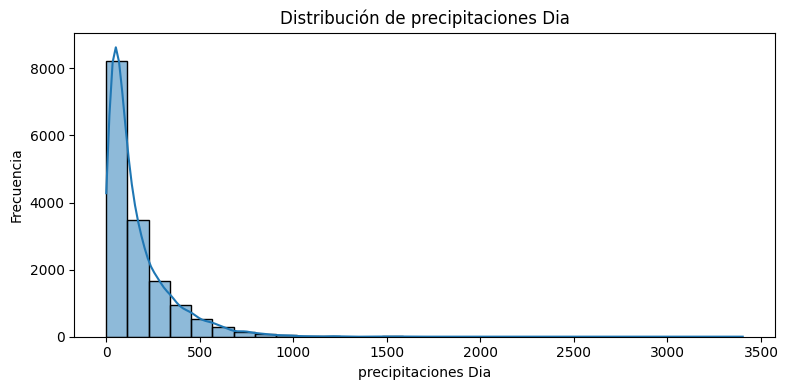

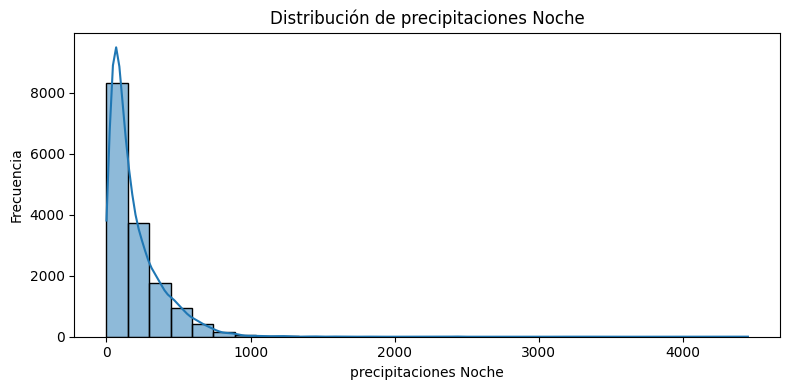

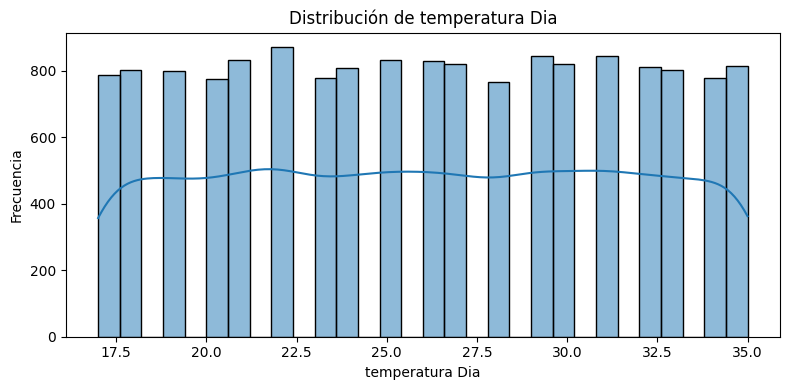

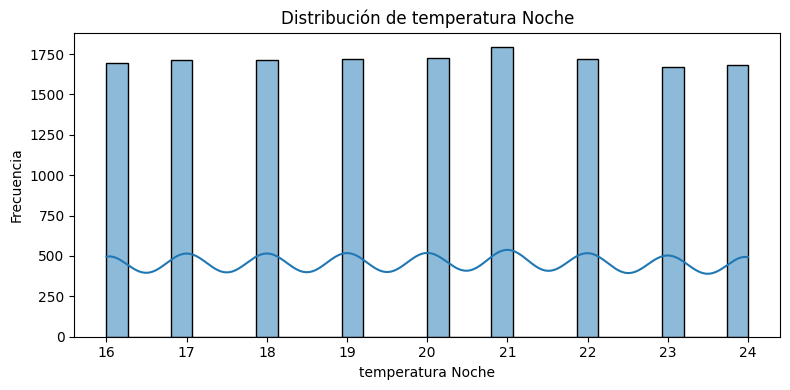

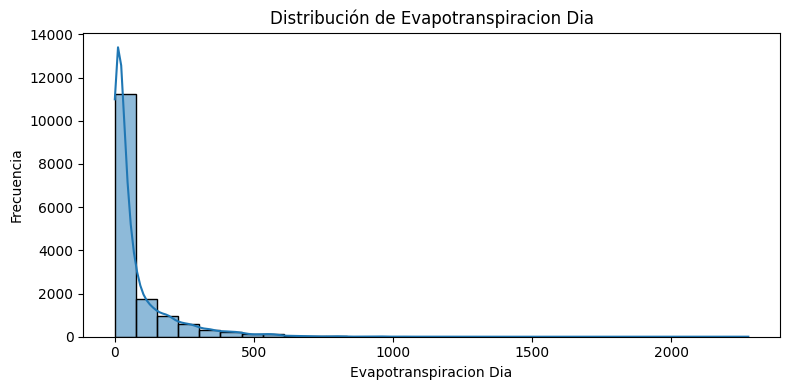

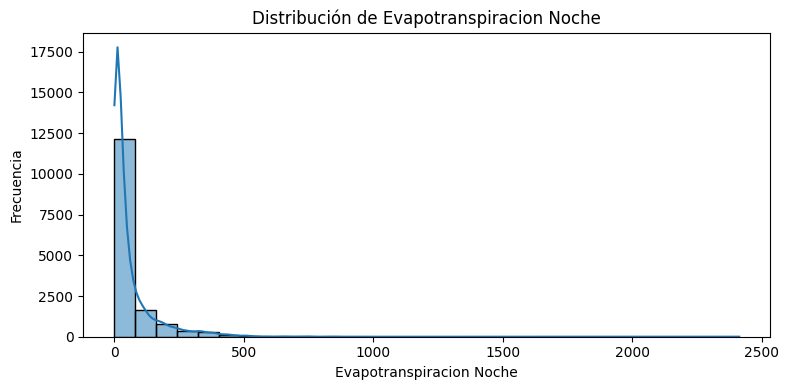

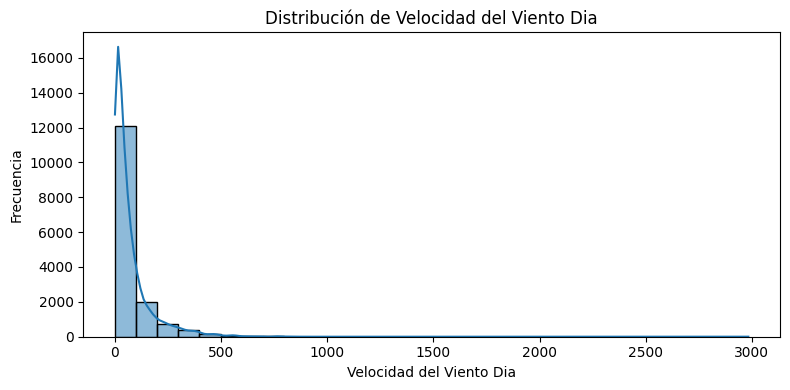

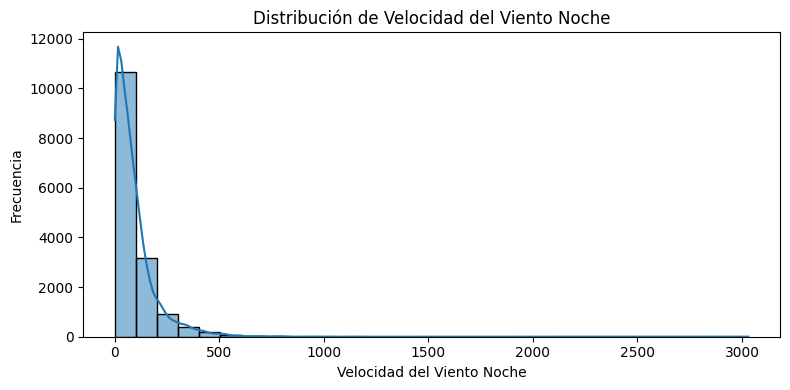

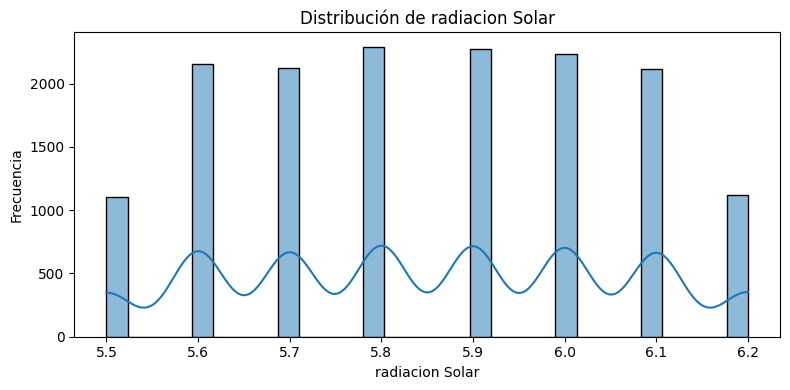

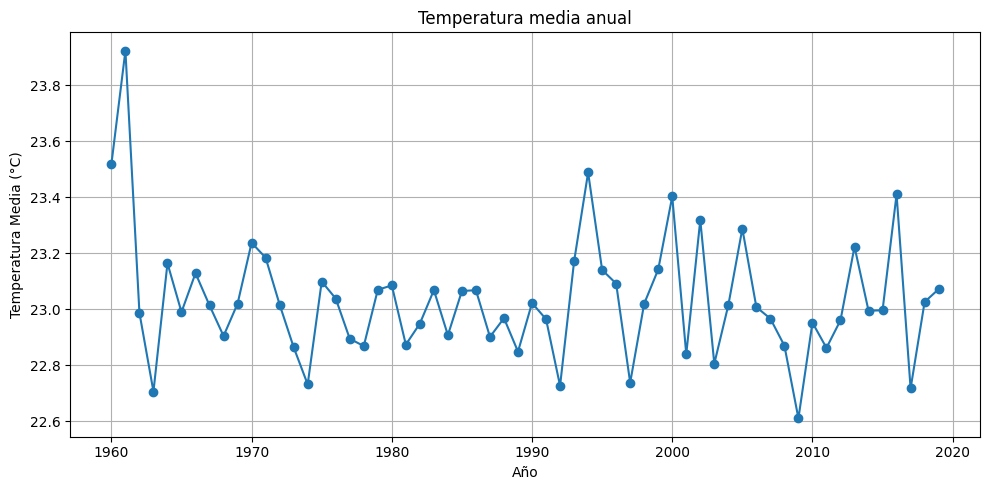

In [57]:
# Informacion General del Dataset
print(" Información general:")
print(df.info())

# Estadísticas descriptivas
print("\n Estadísticas descriptivas:")
print(df.describe())

# Matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Mapa de calor de correlaciones
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

# Histograma de variables clave
vars_to_plot = [
    "precipitaciones Dia", "precipitaciones Noche",
    "temperatura Dia", "temperatura Noche",
    "Evapotranspiracion Dia", "Evapotranspiracion Noche",
    "Velocidad del Viento Dia", "Velocidad del Viento Noche",
    "radiacion Solar"
]

for var in vars_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Tendencia de temperatura media anual
df["temp_media"] = (df["temperatura Dia"] + df["temperatura Noche"]) / 2
temp_anual = df.groupby("anio")["temp_media"].mean()

plt.figure(figsize=(10, 5))
temp_anual.plot(marker='o')
plt.title("Temperatura media anual")
plt.xlabel("Año")
plt.ylabel("Temperatura Media (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


# MODELOS DE APRENDIZAJE NO SUPERVISADO

In [58]:
# Variables predictoras y objetivo
features = [
    'temperatura Dia', 'temperatura Noche',
    'precipitaciones Dia', 'precipitaciones Noche',
    'H. del Suelo Dia', 'H. del Suelo Noche',
    'Velocidad del Viento Dia', 'Velocidad del Viento Noche',
    'radiacion Solar'
]

target = 'Evapotranspiracion Dia'

# Convertir columnas object a float (por coma decimal)
for col in features + [target]:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

In [59]:

# Dividir en conjuntos de entrenamiento y prueba
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\pc\AppData\Local\Temp\ipykernel_37692\3302458315.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df, x="Importancia", y="Variable", palette="viridis")


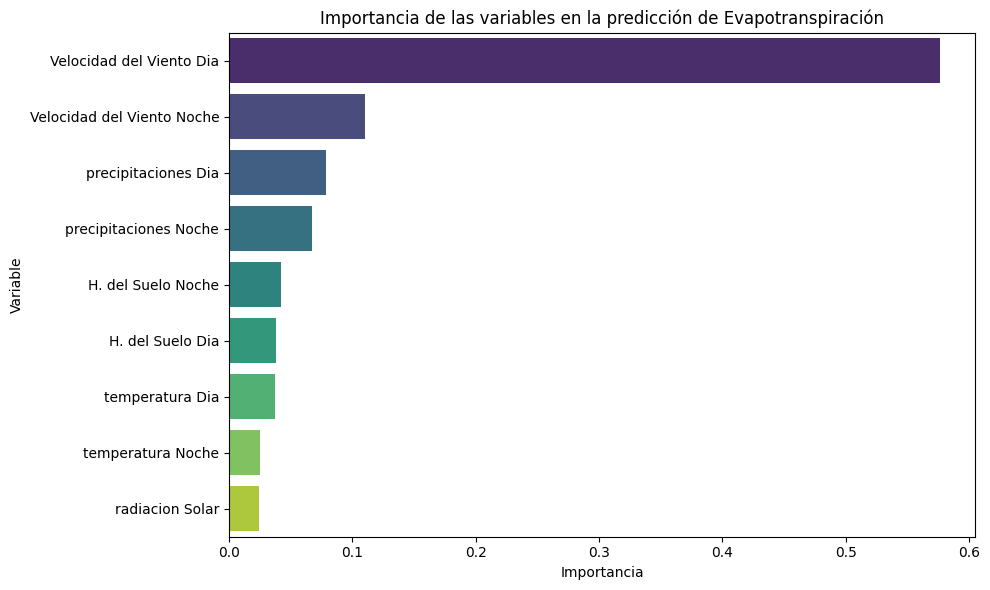


📊 Comparación de modelos:

             Modelo        MAE        R²
0  LinearRegression  47.654770  0.428218
1      RandomForest  43.181079  0.586460
2           XGBoost  42.436614  0.591210
3               ANN  46.504402  0.266202
4               SVR  42.371547  0.538576


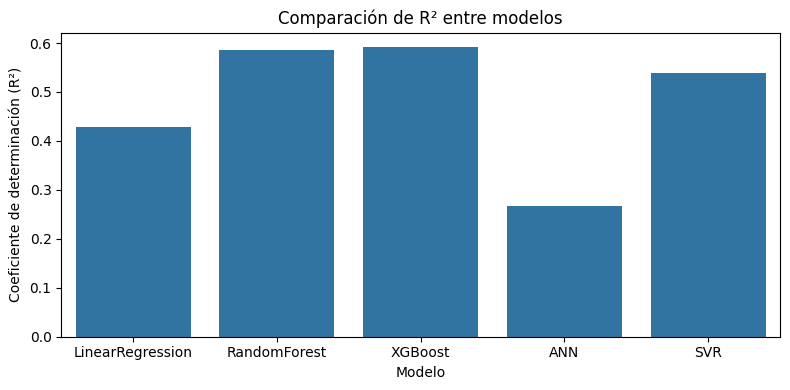

In [90]:

# Convertir columnas object a float
cols_a_convertir = [
    'precipitaciones Dia', 'precipitaciones Noche',
    'temperatura Dia', 'Evapotranspiracion Dia', 'Evapotranspiracion Noche',
    'Velocidad del Viento Dia', 'Velocidad del Viento Noche',
    'radiacion Solar'
]
for col in cols_a_convertir:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Eliminar filas con 0 en temperaturas o evapotranspiración
cols_filtrar = [
    'temperatura Dia', 'temperatura Noche',
    'Evapotranspiracion Dia', 'Evapotranspiracion Noche'
]
df = df[~(df[cols_filtrar] == 0).any(axis=1)]

# Variables predictoras y objetivo
features = [
    'precipitaciones Dia', 'precipitaciones Noche',
    'temperatura Dia', 'temperatura Noche',
    'H. del Suelo Dia', 'H. del Suelo Noche',
    'Velocidad del Viento Dia', 'Velocidad del Viento Noche',
    'radiacion Solar', 'altitud'
]
target = 'Evapotranspiracion Dia'

X = df[features]
y = df[target]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Definir y entrenar modelos ---
modelos = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "ANN": MLPRegressor(hidden_layer_sizes=(100, 50),activation='relu', solver='adam', max_iter=500, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1)
    
}

resultados = []
predicciones_test = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    predicciones_test[nombre] = y_pred[:10]
    
    # Importancia de las variables
    if modelo == 'RandomForest':
        importances = modelo.feature_importances_
        importances_df = pd.DataFrame({
        'Variable': features,
        'Importancia': importances
        }).sort_values(by="Importancia", ascending=False)

        
    
    
    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "R²": r2
    })

# Gráfico de importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x="Importancia", y="Variable", palette="viridis")
plt.title("Importancia de las variables en la predicción de Evapotranspiración")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
    

# --- Mostrar resultados ---
resultados_df = pd.DataFrame(resultados)
print("\n📊 Comparación de modelos:\n")
print(resultados_df)


# Gráfico
plt.figure(figsize=(8, 4))
sns.barplot(data=resultados_df, x="Modelo", y="R²")
plt.title("Comparación de R² entre modelos")
plt.ylabel("Coeficiente de determinación (R²)")
plt.tight_layout()
plt.show()


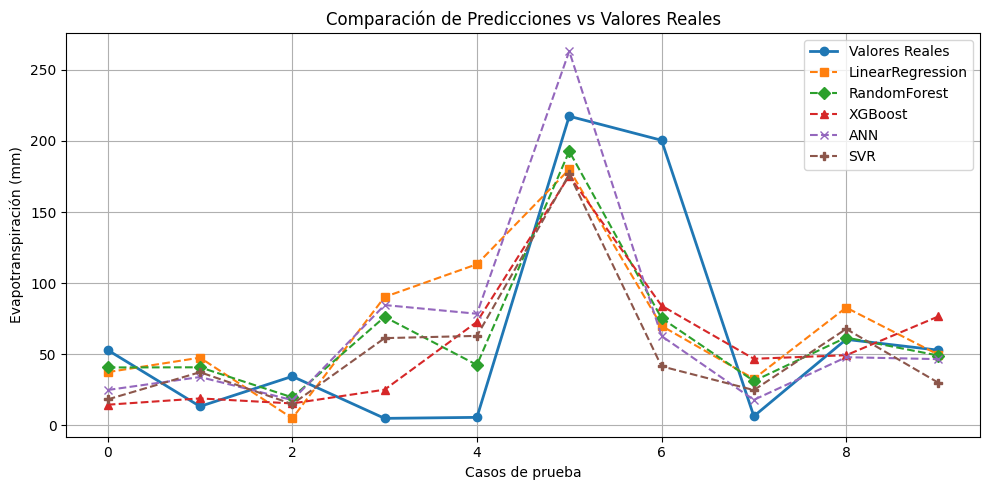

In [91]:
plt.figure(figsize=(10, 5))
marcadores = ['o', 's', 'D', '^', 'x', 'P']
plt.plot(range(10), y_test.values[:10], label='Valores Reales', marker='o', linewidth=2)

for i, (nombre, preds) in enumerate(predicciones_test.items()):
    plt.plot(range(10), preds, label=nombre, marker=marcadores[i+1], linestyle='--')

plt.title("Comparación de Predicciones vs Valores Reales")
plt.xlabel("Casos de prueba")
plt.ylabel("Evapotranspiración (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()